# ДЗ 1, Медведева Анна, 399

## 1 - 3

In [2]:
with open('smsspamcollection/SMSSpamCollection.txt', 'r') as f:
    text = f.readlines()

In [3]:
text_raw = map(lambda s: s.split('\t')[1].rstrip(), text)
text_class = map(lambda s: 1 if s.split('\t')[0] == 'spam' else 0, text)

In [4]:
zip(text_raw[:5], text_class[:5])

[('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
  0),
 ('Ok lar... Joking wif u oni...', 0),
 ("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
  1),
 ('U dun say so early hor... U c already then say...', 0),
 ("Nah I don't think he goes to usf, he lives around here though", 0)]

In [5]:
assert len(text_class) == len(text_raw)

## 4

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [21]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_raw)
y = np.array(text_class)

In [22]:
X.shape, y.shape

((5574, 8713), (5574,))

## 5

In [42]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import f1_score

In [36]:
cross_val_score(LogisticRegressionCV(cv=10, scoring='f1'), X, y, cv=10,
                scoring='f1').mean()

/home/anya/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.93977131382744739

In [43]:
cross_val_score(LogisticRegression(), X, y, cv=10, scoring='f1').mean()

0.93334852685794145

## 6

In [46]:
clf = LogisticRegressionCV(cv=10, scoring='f1').fit(X, y)

In [38]:
test = ["FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! Subscribe6GB",
"FreeMsg: Txt: claim your reward of 3 hours talk time",
"Have you visited the last lecture on physics?",
"Have you visited the last lecture on physics? Just buy this book and you will have all materials! Only 99$",
"Only 99$"]

In [53]:
X_test = vectorizer.transform(test)
predictions = clf.predict(X_test)
classes = ['не спам', 'спам']

for sentence, prediction in zip(test, predictions):
    print classes[prediction] , "\t", sentence[:80]

спам 	FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use 
спам 	FreeMsg: Txt: claim your reward of 3 hours talk time
не спам 	Have you visited the last lecture on physics?
не спам 	Have you visited the last lecture on physics? Just buy this book and you will ha
не спам 	Only 99$


## 7

In [73]:
ngrams = [(2, 2), (3, 3), (1,3)]
names = ['bigrams', 'threegrams', 'unigrams bigrams threegrams']

In [75]:
for name, ngram_range in zip(names, ngrams):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(text_raw)
    score = cross_val_score(LogisticRegressionCV(cv=10, scoring='f1'), X, y, cv=10,
                scoring='f1').mean()
    print name, " : ", round(score, 2)

bigrams  :  0.88
threegrams  :  0.8
unigrams bigrams threegrams  :  0.93


## 8

In [76]:
from sklearn.naive_bayes import MultinomialNB

In [77]:
for name, ngram_range in zip(names, ngrams):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(text_raw)
    score = cross_val_score(MultinomialNB(), X, y, cv=10,
                scoring='f1').mean()
    print name, " : ", round(score, 2)

bigrams  :  0.65
threegrams  :  0.38
unigrams bigrams threegrams  :  0.89


## 9

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [80]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(text_raw)
y = np.array(text_class)

cross_val_score(LogisticRegressionCV(cv=10, scoring='f1'), X, y, cv=10,
                scoring='f1').mean()

0.93664521341817397

In [81]:
cross_val_score(LogisticRegression(), X, y, cv=10,
                scoring='f1').mean()

0.85285995541724557

## 10

In [25]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Зафиксируем разбиение для чистоты эксперимента.

In [12]:
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(text_raw)
y = np.array(text_class)

skf = StratifiedKFold(y, n_folds=10)

In [13]:
params_grid = {'C': [1, 10, 50, 70, 100, 1000, 5000], 'penalty': ['l1', 'l2'],
               'class_weight': [None, 'balanced']}

grid = GridSearchCV(LogisticRegression(), param_grid=params_grid, cv=skf, refit=False, n_jobs=-1, scoring='f1')
grid.fit(X_count, y)
grid.best_score_

0.9520231896830108

In [14]:
grid.best_params_

{'C': 50, 'class_weight': 'balanced', 'penalty': 'l2'}

In [15]:
tfidf = TfidfVectorizer()
X_tf = tfidf.fit_transform(text_raw)
grid.fit(X_tf, y)
grid.best_score_

0.9441183117745602

In [16]:
vectorizer_triple = CountVectorizer(ngram_range=(1,3))
X_count_triple = vectorizer_triple.fit_transform(text_raw)

grid.fit(X_count_triple, y)
grid.best_score_

0.9441672035514799

In [17]:
grid.best_params_

{'C': 1000, 'class_weight': 'balanced', 'penalty': 'l1'}

In [18]:
for cut_off in [1, 5, 10, 30]:
    vectorizer_best = CountVectorizer(min_df=cut_off)
    X_best = vectorizer_best.fit_transform(text_raw)
    grid.fit(X_best, y)
    print cut_off, grid.best_score_

1 0.952023189683
5 0.942767614489
10 0.936672645105
30 0.926129649408


In [19]:
for cut_off in [1, 5, 10, 30]:
    vectorizer_best = CountVectorizer(max_df=cut_off)
    X_best = vectorizer_best.fit_transform(text_raw)
    grid.fit(X_best, y)
    print cut_off, grid.best_score_

/home/anya/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anya/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anya/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anya/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1 0.0
5 0.757759385576
10 0.820305832607
30 0.911681528252


In [21]:
params_grid = {'C': [1, 10, 50, 70, 100, 1000, 5000],
               'class_weight': [None, 'balanced']}

grid = GridSearchCV(SVC(), param_grid=params_grid, cv=skf, refit=False, n_jobs=-1, scoring='f1')
grid.fit(X_count, y)
grid.best_score_

/home/anya/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anya/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anya/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anya/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.9466741074564049

In [23]:
grid.best_params_

{'C': 1000, 'class_weight': 'balanced'}

In [24]:
grid = GridSearchCV(LinearSVC(), param_grid=params_grid, cv=skf, refit=False, n_jobs=-1, scoring='f1')
grid.fit(X_count, y)
grid.best_score_

0.941502235651051

In [33]:
pca = PCA(n_components=600)
X_pca = pca.fit_transform(X_count.toarray())

(0, 0.01)

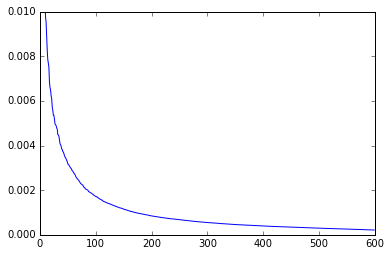

In [34]:
plt.plot(pca.explained_variance_ratio_)
plt.ylim((0,0.01))

In [35]:
grid = GridSearchCV(LogisticRegression(), param_grid=params_grid, cv=skf, refit=False, n_jobs=-1, scoring='f1')
grid.fit(X_pca, y)
grid.best_score_

0.9443046256566466

In [36]:
grid = GridSearchCV(SVC(), param_grid=params_grid, cv=skf, refit=False, n_jobs=-1, scoring='f1')
grid.fit(X_pca, y)
grid.best_score_

0.9407520921578783

## 11

Попробовала:
- Настроить регрессию
- PCA + tuned Logreg
- PCA + tuned SVC
- PCA + tuned LinearSVC
- униграммы, биграммы, триграммы + tuned SVC
- униграммы, биграммы, триграммы + tuned Logreg
- Обрезать сверху/снизу по частотам слова в countVectizer + tuned Logreg

Лучший скор у логистической регрессии - 95.2 с весами в функции потерь пропорционально классам и $l2$ регуляризацией (C=50).

Выводы из задания:
- Подсчет биграмм и триграмм не всегда улучшает качество классификации
- PCA, Tfidf тоже не всегда улучшает качество
- Настроенной логистической регрессии хватает для скора 92.5 на кросс-валидации